<a href="https://colab.research.google.com/github/wooheejin01/01/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
titanic = pd.read_csv("/content/sample_data/gender_submission.csv")

In [36]:
print(titanic)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [37]:
titanic.to_csv('gender_submission.csv')

In [38]:
titanic.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [39]:
print(pd.unique(titanic['Survived']))

[0 1]


In [40]:
titanic_input = titanic['Survived'].to_numpy()
titanic_target = titanic['PassengerId'].to_numpy()


In [41]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(titanic_input, titanic_target, random_state=202032127)

In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [45]:
from sklearn.linear_model import SGDClassifier

In [81]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.005988023952095809
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [82]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.005988023952095809
0.0


//결정트리

In [49]:
titanic.to_csv('gender_submission.csv')

In [51]:
import pandas as pd
titanic = pd.read_csv('gender_submission.csv')

In [55]:
titanic.head()

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,1
2,2,894,0
3,3,895,0
4,4,896,1


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   418 non-null    int64
 1   PassengerId  418 non-null    int64
 2   Survived     418 non-null    int64
dtypes: int64(3)
memory usage: 9.9 KB


In [53]:
titanic.describe()

,Unnamed: 0,PassengerId,Survived
count,418.000000,418.000000,418.000000
mean,208.500000,1100.500000,0.363636
std,120.810458,120.810458,0.481622
min,0.000000,892.000000,0.000000
25%,104.250000,996.250000,0.000000
50%,208.500000,1100.500000,0.000000
75%,312.750000,1204.750000,1.000000
max,417.000000,1309.000000,1.000000


In [56]:
data = titanic[['Survived']].to_numpy()
target = titanic['PassengerId'].to_numpy()

In [57]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=202032127)

In [58]:
print(train_input.shape, test_input.shape)

(334, 1) (84, 1)


훈련세트: 334개, 테스트세트: 84개

In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.005988023952095809
0.0


점수가 매우 낮다

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202032127)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 훈련

0.005988023952095809
0.0


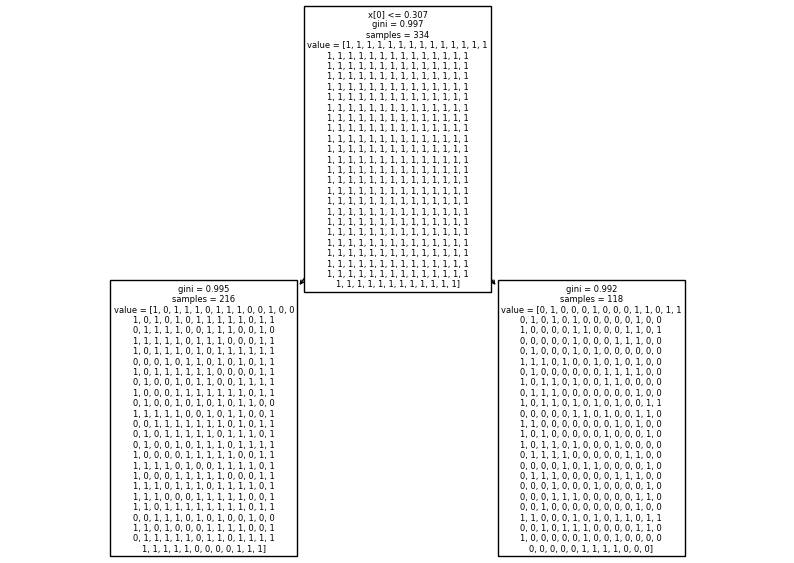

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

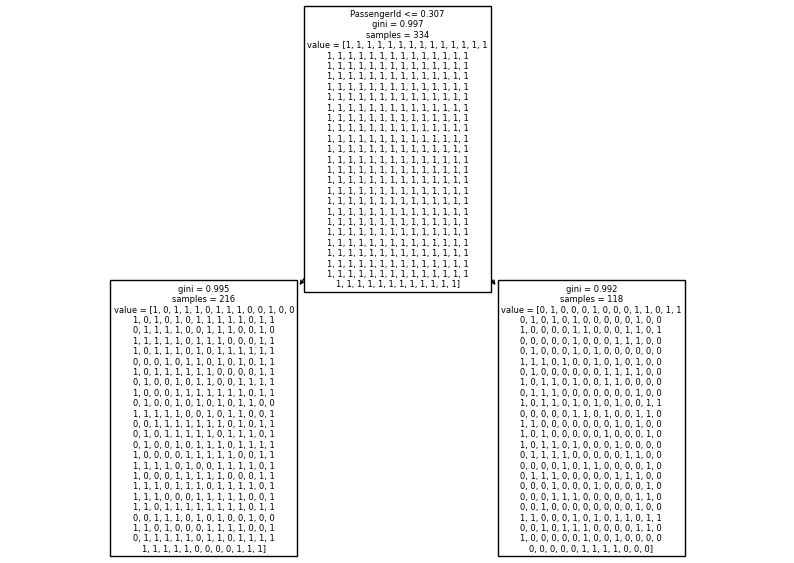

In [64]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['PassengerId'])
plt.show()

//랜덤포레스

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = pd.read_csv('/content/sample_data/gender_submission.csv')
data = titanic[['Survived']].to_numpy()
target = titanic['PassengerId'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split( data, target, test_size = 0.2, random_state=202032127)

In [105]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[1.]


In [67]:
rf = RandomForestClassifier(oob_score=True, n_jobs= -1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.0


//히스토그램 기반 그래언트 부스

In [95]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=202032127, n_jobs=-1)
print(result.importances_mean)

[0.00329341]


In [96]:
result = permutation_importance(hgb, test_input, test_target,
                               n_repeats=10, random_state=202032127, n_jobs=-1)
print(result.importances_mean)

[0.]


In [97]:
hgb.score(test_input, test_target)

0.0